In [1]:
#pip install tensorflow

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [3]:
forest_fires = pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\nureal networks\\forestfires.csv")

In [4]:
forest_fires_2 = forest_fires.iloc[0: , 2:]

In [5]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
forest_fires_2.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

<AxesSubplot:>

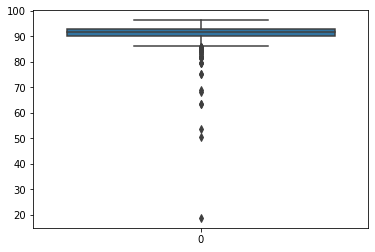

In [7]:
sns.boxplot(data=[forest_fires_2['FFMC']])

<AxesSubplot:>

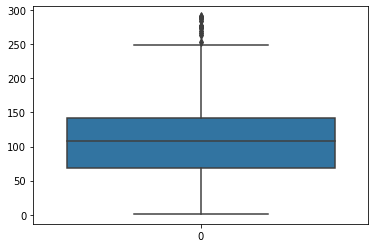

In [8]:
sns.boxplot(data=[forest_fires_2['DMC']])

<AxesSubplot:>

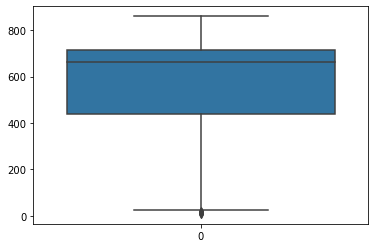

In [9]:
sns.boxplot(data=[forest_fires_2['DC']])

<AxesSubplot:>

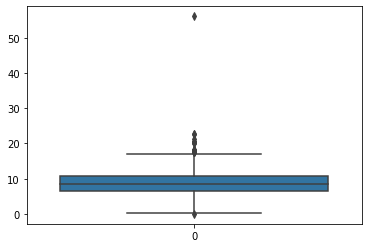

In [10]:
sns.boxplot(data=[forest_fires_2['ISI']])

<AxesSubplot:>

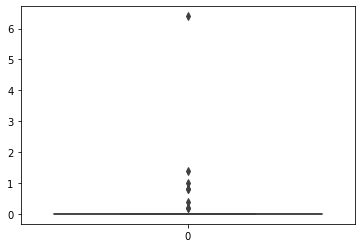

In [11]:
sns.boxplot(data=[forest_fires_2['rain']])

<AxesSubplot:>

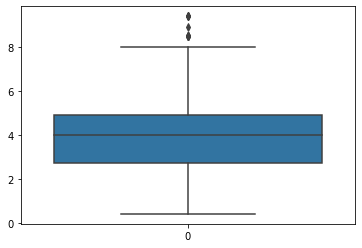

In [12]:
sns.boxplot(data=[forest_fires_2['wind']])

<AxesSubplot:>

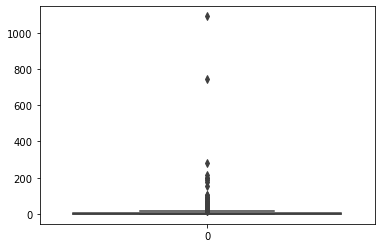

In [13]:
sns.boxplot(data=[forest_fires_2['area']])

##  detecting outliers

In [14]:
Q1  = forest_fires_2.wind.quantile(0.25)
Q3  = forest_fires_2.wind.quantile(0.75)
print(Q3,Q1)

4.9 2.7


In [15]:
iqr = Q3-Q1
print(iqr)

2.2


In [16]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

8.200000000000001 -0.6000000000000001


In [17]:
forest_fires_2[(forest_fires_2.wind<lower_limit)|(forest_fires_2.wind>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
142,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,0.61,1,...,0,0,0,0,0,0,0,0,0,small
162,90.6,50.1,100.4,7.8,15.2,31,8.5,0.0,1.94,0,...,0,0,0,0,1,0,0,0,0,small
168,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53,1,...,0,0,0,0,1,0,0,0,0,small
273,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,0,...,0,0,0,0,0,0,0,0,0,large
276,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85,0,...,0,0,0,0,0,0,0,0,0,large
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,...,0,0,0,0,0,0,0,0,0,large
278,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03,0,...,0,0,0,0,0,0,0,0,0,large
279,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,0,...,0,0,0,0,0,0,0,0,0,large
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,...,0,0,0,0,0,0,0,0,0,large
411,84.6,3.2,43.6,3.3,8.2,53,9.4,0.0,4.62,1,...,1,0,0,0,0,0,0,0,0,small


In [18]:
forest_fires_2 = forest_fires_2[(forest_fires_2.wind>lower_limit) & (forest_fires_2.wind<upper_limit)]

In [19]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [20]:
Q1  = forest_fires_2.ISI.quantile(0.25)
Q3  = forest_fires_2.ISI.quantile(0.75)
print(Q3,Q1)

10.725 6.5


In [21]:
iqr = Q3-Q1
print(iqr)

4.225


In [22]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

17.0625 0.16250000000000053


In [23]:
forest_fires_2[(forest_fires_2.ISI<lower_limit)|(forest_fires_2.ISI>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
11,92.8,73.2,713.0,22.6,19.3,38,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
22,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,small
24,93.5,139.4,594.2,20.3,23.7,32,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
133,93.7,80.9,685.2,17.9,17.6,42,3.1,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
135,93.5,139.4,594.2,20.3,17.6,52,5.8,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
149,93.7,80.9,685.2,17.9,23.7,25,4.5,0.0,1.12,0,...,0,0,0,0,0,0,0,0,1,small
206,93.5,139.4,594.2,20.3,22.9,31,7.2,0.0,15.45,0,...,0,0,0,0,0,0,0,0,0,large
209,93.7,80.9,685.2,17.9,23.2,26,4.9,0.0,23.41,0,...,0,0,0,0,0,0,0,0,1,large
211,93.5,139.4,594.2,20.3,5.1,96,5.8,0.0,26.00,0,...,0,0,0,0,0,0,0,0,0,large
266,94.3,131.7,607.1,22.7,19.4,55,4.0,0.0,0.17,0,...,0,0,0,0,0,0,0,0,0,small


In [24]:
forest_fires_2 = forest_fires_2[(forest_fires_2.ISI>lower_limit) & (forest_fires_2.ISI<upper_limit)]

In [25]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


<AxesSubplot:>

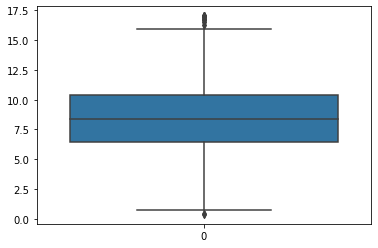

In [26]:
sns.boxplot(data=[forest_fires_2['ISI']])

In [27]:
Q1  = forest_fires_2.ISI.quantile(0.25)
Q3  = forest_fires_2.ISI.quantile(0.75)
print(Q3,Q1)

10.35 6.4


In [28]:
iqr = Q3-Q1
print(iqr)

3.9499999999999993


In [29]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

16.275 0.4750000000000014


In [30]:
forest_fires_2[(forest_fires_2.ISI<lower_limit)|(forest_fires_2.ISI>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
42,94.8,108.3,647.1,17.0,16.6,54,5.4,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
82,94.8,108.3,647.1,17.0,18.6,51,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
102,94.8,108.3,647.1,17.0,20.1,40,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
148,94.8,108.3,647.1,17.0,17.4,43,6.7,0.0,1.07,0,...,0,0,0,0,0,0,0,0,0,small
155,94.8,108.3,647.1,17.0,16.4,47,1.3,0.0,1.56,0,...,0,0,0,0,0,0,0,0,0,small
167,96.0,127.1,570.5,16.5,23.4,33,4.5,0.0,2.51,0,...,0,0,0,0,0,0,0,0,0,small
192,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,8.71,0,...,0,0,0,0,0,0,0,0,0,large
194,94.8,108.3,647.1,17.0,24.6,22,4.5,0.0,10.01,0,...,0,0,0,0,0,0,0,0,0,large
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,...,0,0,0,1,0,0,0,0,0,small
312,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small


In [31]:
forest_fires_2 = forest_fires_2[(forest_fires_2.ISI>lower_limit) & (forest_fires_2.ISI<upper_limit)]

In [32]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [33]:
Q1  = forest_fires_2.ISI.quantile(0.25)
Q3  = forest_fires_2.ISI.quantile(0.75)
print(Q3,Q1)

10.0 6.35


In [34]:
iqr = Q3-Q1
print(iqr)

3.6500000000000004


In [35]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

15.475000000000001 0.8749999999999991


In [36]:
forest_fires_2[(forest_fires_2.ISI<lower_limit)|(forest_fires_2.ISI>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
12,63.5,70.8,665.3,0.8,17.0,72,6.7,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small
30,94.3,85.1,692.3,15.9,25.4,24,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,small
45,94.3,85.1,692.3,15.9,25.9,24,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
71,94.3,85.1,692.3,15.9,17.7,37,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,small
97,69.0,2.4,15.5,0.7,17.4,24,5.4,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
124,94.3,85.1,692.3,15.9,19.8,50,5.4,0.0,0.00,1,...,0,0,0,0,0,0,0,0,1,small
130,68.2,21.5,87.2,0.8,15.4,40,2.7,0.0,0.00,0,...,1,0,0,0,0,0,0,0,0,small
153,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,1.46,1,...,0,0,0,0,0,0,0,0,1,small
199,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,11.32,0,...,0,0,0,0,0,0,0,0,1,large
212,94.3,85.1,692.3,15.9,20.1,47,4.9,0.0,26.13,1,...,0,0,0,0,0,0,0,0,1,large


In [37]:
forest_fires_2 = forest_fires_2[(forest_fires_2.ISI>lower_limit) & (forest_fires_2.ISI<upper_limit)]

In [38]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [39]:
Q1  = forest_fires_2.ISI.quantile(0.25)
Q3  = forest_fires_2.ISI.quantile(0.75)
print(Q3,Q1)

9.9 6.4


In [40]:
iqr = Q3-Q1
print(iqr)

3.5


In [41]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

15.15 1.1500000000000004


In [42]:
forest_fires_2[(forest_fires_2.ISI<lower_limit)|(forest_fires_2.ISI>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,small


In [43]:
forest_fires_2 = forest_fires_2[(forest_fires_2.ISI>lower_limit) & (forest_fires_2.ISI<upper_limit)]

In [44]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large


In [45]:
Q1  = forest_fires_2.DMC.quantile(0.25)
Q3  = forest_fires_2.DMC.quantile(0.75)
print(Q3,Q1)

143.15 67.02499999999999


In [46]:
iqr = Q3-Q1
print(iqr)

76.12500000000001


In [47]:
lower_limit = Q1 - 1.5*(iqr)
upper_limit = Q3 + 1.5*(iqr)
print(upper_limit,lower_limit)

257.33750000000003 -47.16250000000004


In [48]:
forest_fires_2[(forest_fires_2.DMC<lower_limit)|(forest_fires_2.DMC>upper_limit)]

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
369,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
370,91.0,276.3,825.1,7.1,13.8,77,7.6,0.0,11.06,0,...,0,0,0,0,0,0,0,0,1,large
374,90.3,290.0,855.3,7.4,10.3,78,4.0,0.0,18.30,1,...,0,0,0,0,0,0,0,0,1,large
384,91.6,273.8,819.1,7.7,21.3,44,4.5,0.0,12.18,0,...,0,0,0,0,0,0,0,0,0,large
392,91.0,276.3,825.1,7.1,21.9,43,4.0,0.0,70.76,0,...,0,0,0,0,0,0,0,0,1,large
406,87.1,291.3,860.6,4.0,17.0,67,4.9,0.0,3.95,0,...,0,0,0,0,0,0,0,0,1,small
408,90.3,290.0,855.3,7.4,19.9,44,3.1,0.0,7.80,1,...,0,0,0,0,0,0,0,0,1,large
422,88.9,263.1,795.9,5.2,29.3,27,3.6,0.0,6.30,0,...,0,0,1,0,0,0,0,0,0,large
430,89.7,287.2,849.3,6.8,19.4,45,3.6,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,small
434,90.6,269.8,811.2,5.5,22.2,45,3.6,0.0,0.00,1,...,0,0,0,0,0,0,0,0,0,small


In [49]:
forest_fires_2 = forest_fires_2[(forest_fires_2.DMC>lower_limit) & (forest_fires_2.DMC<upper_limit)]

In [50]:
forest_fires_2

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large


<AxesSubplot:>

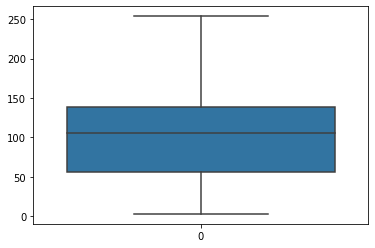

In [51]:
sns.boxplot(data=[forest_fires_2['DMC']])

<AxesSubplot:>

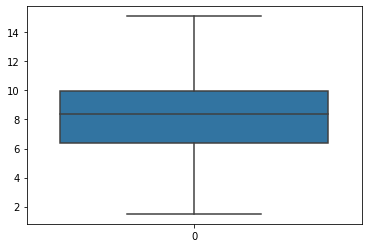

In [52]:
sns.boxplot(data=[forest_fires_2['ISI']])

<AxesSubplot:>

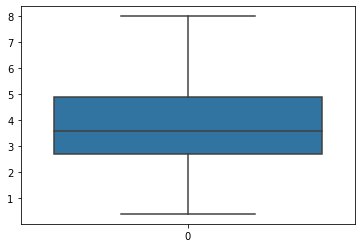

In [53]:
sns.boxplot(data=[forest_fires_2['wind']])

In [54]:
forest_fires_2.skew()

FFMC        -1.787360
DMC          0.262536
DC          -1.095978
ISI          0.129163
temp        -0.311016
RH           0.843043
wind         0.341600
rain        18.280759
area        11.960664
dayfri       1.917927
daymon       1.992388
daysat       1.824677
daysun       1.578297
daythu       2.275552
daytue       2.373593
daywed       2.675797
monthapr     7.237082
monthaug     0.673547
monthdec    12.027431
monthfeb     4.651290
monthjan    20.976177
monthjul     3.510977
monthjun     5.353193
monthmar     2.407916
monthmay    14.781514
monthnov     0.000000
monthoct     5.152622
monthsep     0.684279
dtype: float64

In [55]:
forest_fires_2['area'] = np.log(forest_fires_2['area']+1)

<AxesSubplot:ylabel='Density'>

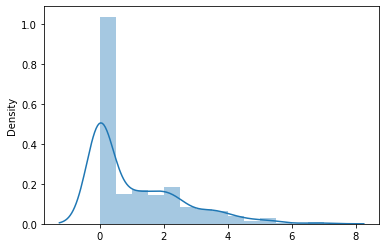

In [56]:
sns.distplot([forest_fires_2['area']])

<AxesSubplot:ylabel='Density'>

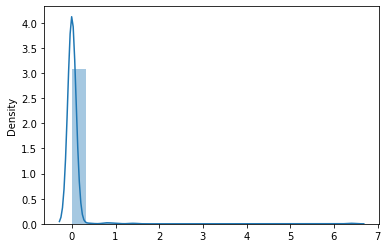

In [57]:
sns.distplot([forest_fires_2['rain']])

In [58]:
forest_fires_2['rain'] = np.log(forest_fires_2['rain']+1)

<AxesSubplot:ylabel='Density'>

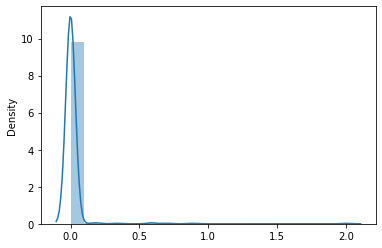

In [59]:
sns.distplot([forest_fires_2['rain']])

In [60]:
forest_fires_2.skew()

FFMC        -1.787360
DMC          0.262536
DC          -1.095978
ISI          0.129163
temp        -0.311016
RH           0.843043
wind         0.341600
rain        13.067102
area         1.313383
dayfri       1.917927
daymon       1.992388
daysat       1.824677
daysun       1.578297
daythu       2.275552
daytue       2.373593
daywed       2.675797
monthapr     7.237082
monthaug     0.673547
monthdec    12.027431
monthfeb     4.651290
monthjan    20.976177
monthjul     3.510977
monthjun     5.353193
monthmar     2.407916
monthmay    14.781514
monthnov     0.000000
monthoct     5.152622
monthsep     0.684279
dtype: float64

In [61]:
forest_fires_2.shape

(440, 29)

## splitting data for random sample for test and train data 

In [62]:
X = forest_fires_2.iloc[0: , 0:28]

In [63]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.182322,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.000000,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,81.6,56.7,665.6,1.9,27.8,35,2.7,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.000000,2.006871,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.000000,4.012592,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.000000,2.498152,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
y = forest_fires_2['size_category']

In [65]:
y

0      small
1      small
2      small
3      small
4      small
       ...  
511    small
512    large
513    large
514    large
515    small
Name: size_category, Length: 440, dtype: object

In [66]:
X_train = X.sample(n=308,replace=False,random_state=0)

In [67]:
X_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
238,92.5,121.1,674.4,8.6,25.1,27,4.0,0.000000,6.995620,0,...,0,0,0,0,0,0,0,0,0,1
395,85.0,9.0,56.9,3.5,10.1,62,1.8,0.000000,3.966132,0,...,0,1,0,0,0,0,0,0,0,0
286,91.2,183.1,437.7,12.5,12.6,90,7.6,0.182322,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
358,92.5,122.0,789.7,10.2,19.7,39,2.7,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,1
61,89.3,51.3,102.2,9.6,5.5,59,6.3,0.000000,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,90.8,84.7,376.6,5.6,23.8,51,1.8,0.000000,0.000000,0,...,0,0,0,1,0,0,0,0,0,0
210,90.6,43.7,686.9,6.7,18.4,25,3.1,0.000000,3.228034,0,...,0,0,0,0,0,0,0,0,1,0
452,91.5,238.2,730.6,7.5,17.7,65,4.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
89,91.7,35.8,80.8,7.8,17.4,25,4.9,0.000000,0.000000,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
X_test  =  X.drop(X_train.index)

In [69]:
X_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.000000,0.000000,1,...,0,0,0,0,0,1,0,0,0,0
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
13,90.9,126.5,686.5,7.0,21.3,42,2.2,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
27,90.9,126.5,686.5,7.0,19.4,48,1.3,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
29,93.5,149.3,728.6,8.1,22.8,39,3.6,0.000000,0.000000,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,95.9,158.0,633.6,11.3,32.4,27,2.2,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
497,96.1,181.1,671.2,14.3,32.3,27,2.2,0.000000,2.752386,0,...,0,0,0,0,0,0,0,0,0,0
499,96.1,181.1,671.2,14.3,27.3,63,4.9,2.001480,2.469793,0,...,0,0,0,0,0,0,0,0,0,0
500,96.1,181.1,671.2,14.3,21.6,65,4.9,0.587787,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y_train  = y.sample(n=308,replace=False,random_state=0)

In [71]:
y_train

238    large
395    large
286    small
358    small
61     small
       ...  
435    small
210    large
452    small
89     small
346    large
Name: size_category, Length: 308, dtype: object

In [72]:
y_test  =  y.drop(y_train.index)

In [73]:
y_test

0      small
9      small
13     small
27     small
29     small
       ...  
492    small
497    large
499    large
500    small
514    large
Name: size_category, Length: 132, dtype: object

## Standardizing the X data  for pca

In [74]:
sc = StandardScaler()
sc_x_train = sc.fit_transform(X_train)

In [75]:
sc_x_train

array([[ 0.44927161,  0.22781248,  0.4966498 , ...,  0.        ,
        -0.18318583,  1.41077683],
       [-2.09315227, -1.74917336, -2.02067489, ...,  0.        ,
        -0.18318583, -0.70882933],
       [ 0.00858481,  1.32123908, -0.46829069, ...,  0.        ,
        -0.18318583, -0.70882933],
       ...,
       [ 0.11028176,  2.29297788,  0.72575693, ...,  0.        ,
        -0.18318583, -0.70882933],
       [ 0.17807973, -1.27653089, -1.92324321, ...,  0.        ,
        -0.18318583, -0.70882933],
       [ 0.11028176,  0.38653569,  1.03761982, ...,  0.        ,
        -0.18318583,  1.41077683]])

In [76]:
sc_x_test = sc.fit_transform(X_test)

In [77]:
sc_x_test

array([[-1.36139062, -1.29438826, -1.61561166, ...,  0.        ,
        -0.19841895, -0.73135745],
       [ 0.60993524, -0.2440867 ,  0.70733681, ...,  0.        ,
        -0.19841895,  1.36732045],
       [ 0.10928105,  0.41022737,  0.66082403, ...,  0.        ,
        -0.19841895,  1.36732045],
       ...,
       [ 1.73640716,  1.3381637 ,  0.60201034, ...,  0.        ,
        -0.19841895, -0.73135745],
       [ 1.73640716,  1.3381637 ,  0.60201034, ...,  0.        ,
        -0.19841895, -0.73135745],
       [-2.80077141, -0.77603555,  0.58048376, ...,  0.        ,
        -0.19841895, -0.73135745]])

### applying pca for traning and testing data for dim reduction 

In [78]:
from sklearn.decomposition import PCA

In [79]:
pca = PCA(n_components = 3 , random_state= 12)

In [80]:
pca_1 = pca.fit_transform(sc_x_train)

In [81]:
pca_2 = pca.fit_transform(sc_x_test)

In [82]:
pca_1 ### traning data

array([[-1.29252159e+00, -2.38790278e+00,  3.48181115e-01],
       [ 4.97563271e+00,  2.52892508e-01, -2.77263915e+00],
       [ 7.99597321e-02,  2.74458012e+00, -3.23018620e-01],
       [-1.05295369e+00, -1.48804873e+00,  3.07030833e-01],
       [ 3.26735411e+00,  2.55080490e+00,  1.26612233e+00],
       [-1.55251325e+00, -1.16393017e+00,  1.53560170e+00],
       [ 4.46517357e+00,  4.56293826e-01, -2.13925602e+00],
       [-1.82129737e-01, -1.63192623e+00, -4.65597477e-01],
       [-1.25689103e+00, -1.13132827e+00,  1.30128935e+00],
       [-6.28042388e-01, -1.07585230e+00, -1.44586866e-01],
       [ 5.49826353e-03, -8.96041787e-01,  2.28524592e-01],
       [-1.10731952e+00,  1.54257968e+00, -9.52686410e-01],
       [-1.45192589e-01, -1.74456132e+00, -1.34066684e-01],
       [-6.92918575e-01, -1.40648452e+00,  4.69813692e-01],
       [-2.49216132e-01,  1.21422222e+00,  1.96917378e+00],
       [-1.96097165e+00,  7.54596442e-01,  1.96021003e-03],
       [-2.04261011e-01, -1.85728588e+00

In [83]:
pca_2 ## testing data 


array([[ 4.24893462,  1.4412739 , -0.73121587],
       [-0.82966844, -0.86952807, -0.80644568],
       [-0.66788118, -1.77903097, -0.88594985],
       [-0.581402  , -1.99236789, -0.76544659],
       [-1.71544895, -1.23600738, -0.79060727],
       [-0.61539131, -1.49203244, -0.78654515],
       [-0.09860929, -0.53524835, -0.49454881],
       [ 1.48698768,  0.1133489 , -0.41853058],
       [-0.25316878,  1.64277046,  0.8366893 ],
       [ 0.57293517, -1.16272701,  0.84148915],
       [ 0.22498558, -1.67219702,  0.27083525],
       [ 3.23915924,  0.09532517, -1.68257181],
       [ 3.47431402,  0.93334564, -0.80779272],
       [-2.15122676, -1.49162253, -1.90893787],
       [-0.89340426,  0.29873505,  0.38993101],
       [-2.46420644, -1.28186232, -1.78465512],
       [ 0.01557241, -0.66862185, -0.83851653],
       [ 2.22479797,  1.60641882, -1.11833442],
       [-0.64770407,  0.23266883, -0.16873748],
       [-0.86893082,  0.48534515,  0.43927599],
       [ 2.00362583,  2.05560083, -2.423

In [84]:
pca_final_train= pd.DataFrame(data=pca_1)
pca_final_train

,0,1,2
0,-1.292522,-2.387903,0.348181
1,4.975633,0.252893,-2.772639
2,0.079960,2.744580,-0.323019
3,-1.052954,-1.488049,0.307031
4,3.267354,2.550805,1.266122
...,...,...,...
303,0.613426,-0.688112,0.104338
304,0.694629,-2.137789,0.483000
305,-0.986676,0.483487,-1.978837
306,2.095905,0.682698,3.108593


In [85]:
pca_final_test= pd.DataFrame(data=pca_2)
pca_final_test

,0,1,2
0,4.248935,1.441274,-0.731216
1,-0.829668,-0.869528,-0.806446
2,-0.667881,-1.779031,-0.885950
3,-0.581402,-1.992368,-0.765447
4,-1.715449,-1.236007,-0.790607
...,...,...,...
127,-2.898539,1.668990,-1.179861
128,-4.197541,1.429243,0.537463
129,-4.236736,4.029064,4.928099
130,-2.963611,2.451702,2.752245


In [86]:
pca_final_train.columns=['PC1','PC2','PC3']


In [87]:
pca_final_test.columns=['PC1','PC2','PC3']


In [88]:
pca_final_train

,PC1,PC2,PC3
0,-1.292522,-2.387903,0.348181
1,4.975633,0.252893,-2.772639
2,0.079960,2.744580,-0.323019
3,-1.052954,-1.488049,0.307031
4,3.267354,2.550805,1.266122
...,...,...,...
303,0.613426,-0.688112,0.104338
304,0.694629,-2.137789,0.483000
305,-0.986676,0.483487,-1.978837
306,2.095905,0.682698,3.108593


In [89]:
pca_final_test

,PC1,PC2,PC3
0,4.248935,1.441274,-0.731216
1,-0.829668,-0.869528,-0.806446
2,-0.667881,-1.779031,-0.885950
3,-0.581402,-1.992368,-0.765447
4,-1.715449,-1.236007,-0.790607
...,...,...,...
127,-2.898539,1.668990,-1.179861
128,-4.197541,1.429243,0.537463
129,-4.236736,4.029064,4.928099
130,-2.963611,2.451702,2.752245


In [90]:
var=pca.explained_variance_ratio_
var

array([0.17278099, 0.07564286, 0.07018829])

## model fitting 

In [91]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [92]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(pca_final_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.774 total time=   1.2s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.758 total time=   0.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.806 total time=   0.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.689 total time=   0.8s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.803 total time=   1.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [93]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7661025881767273, using {'batch_size': 10, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 10, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 10, 'epochs': 50}
0.7499735593795777,0.03963213015239709 with: {'batch_size': 10, 'epochs': 100}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 50}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 100}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 40, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 40, 'epochs': 50}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 40, 'epochs': 100}


In [94]:
train_pred = grid.predict(pca_final_train)

In [95]:
test_pred = grid.predict(pca_final_test)

In [96]:
accuracy_score(y_train , train_pred)

0.7662337662337663

In [97]:
accuracy_score(y_test , test_pred)

0.6893939393939394

In [98]:
confusion_matrix(y_train , train_pred)

array([[  0,  72],
       [  0, 236]], dtype=int64)

In [99]:
confusion_matrix(y_test , test_pred)

array([[ 0, 41],
       [ 0, 91]], dtype=int64)

removing layers and droupouts

In [100]:

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 30)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid1 = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid1.fit(pca_final_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.774 total time=   1.5s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.758 total time=   1.6s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   1.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.689 total time=   1.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.803 total time=   2.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [101]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7661025881767273, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [102]:
tran_pred_1 = grid1.predict(pca_final_train)

In [103]:
confusion_matrix(y_train , tran_pred_1)

array([[  0,  72],
       [  0, 236]], dtype=int64)

In [104]:
accuracy_score(y_train , tran_pred_1)

0.7662337662337663

## model testing/

In [105]:
test_pred_1 = grid1.predict(pca_final_test)

In [106]:
confusion_matrix(y_test , test_pred_1)

array([[ 0, 41],
       [ 0, 91]], dtype=int64)

In [107]:
accuracy_score(y_test , test_pred_1)

0.6893939393939394

### neurons activation layer

In [108]:

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid_2 = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(pca_final_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.774 total time=   0.5s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.758 total time=   0.9s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.806 total time=   0.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.689 total time=   0.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.803 total time=   0.6s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [109]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7661025881767273, using {'batch_size': 10, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 10, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 10, 'epochs': 50}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 10, 'epochs': 100}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 50}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 20, 'epochs': 100}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 40, 'epochs': 10}
0.7661025881767273,0.042798420651132194 with: {'batch_size': 40, 'epochs': 50}
0.7628767848014831,0.04016232018172015 with: {'batch_size': 40, 'epochs': 100}


In [110]:

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Fitting the model

model.fit(pca_final_train,y_train)

# Predicting using trained model

y_predict = model.predict(pca_final_train)

# Printing the metrics
print(accuracy_score(y_train,y_predict))

0.7662337662337663


## on pca the accuracy score  , checking with the normal data 


In [111]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [112]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(sc_x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.919 total time=   0.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.871 total time=   0.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.903 total time=   0.5s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.820 total time=   0.7s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.967 total time=   0.7s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [113]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9221575856208801, using {'batch_size': 20, 'epochs': 10}
0.8960867166519165,0.0492371592918336 with: {'batch_size': 10, 'epochs': 10}
0.9188788890838623,0.03968670723119819 with: {'batch_size': 10, 'epochs': 50}
0.9058170199394227,0.05704440172210519 with: {'batch_size': 10, 'epochs': 100}
0.9221575856208801,0.03448729361223386 with: {'batch_size': 20, 'epochs': 10}
0.905922794342041,0.05181590798444718 with: {'batch_size': 20, 'epochs': 50}
0.9123215317726135,0.05329153842361757 with: {'batch_size': 20, 'epochs': 100}
0.8508196711540222,0.07768165747562863 with: {'batch_size': 40, 'epochs': 10}
0.9155473113059998,0.04062967558474408 with: {'batch_size': 40, 'epochs': 50}
0.9122686386108398,0.05638266913623855 with: {'batch_size': 40, 'epochs': 100}


In [114]:
train_pred_n = grid.predict(sc_x_train)

In [115]:
train_pred_n

array([['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['large'],
       ['large'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['s

In [116]:
accuracy_score(train_pred_n,y_train)

0.9902597402597403

In [117]:
confusion_matrix(train_pred_n,y_train)

array([[ 72,   3],
       [  0, 233]], dtype=int64)

## model testing

In [118]:
test_pred_ff = grid.predict(sc_x_test)

In [119]:
test_pred_ff

array([['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['small'],
       ['large'],
       ['small'],
       ['large'],
       ['large'],
       ['small'],
       ['large'],
       ['l

In [120]:
accuracy_score(y_test , test_pred_ff)

0.8863636363636364

In [121]:
confusion_matrix(y_test , test_pred_ff)

array([[27, 14],
       [ 1, 90]], dtype=int64)

### with activatation function 'relu ' kernal initilizer 'uniform' the model got over fit ,lets us drop layers and and unwanted nerouns

In [122]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 28,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]



param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)


grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(sc_x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.774 total time=   0.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.758 total time=   0.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   0.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.689 total time=   0.3s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.803 total time=   0.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [123]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.921998941898346, using {'dropout_rate': 0.2, 'learning_rate': 0.1}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.840719199180603,0.09886014654732493 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8600211501121521,0.04888020334937838 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.8118455886840821,0.10086465679918427 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9153886795043945,0.028588133708952815 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7661025881767273,0.042798420651132194 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.8608672618865967,0.0843021294318621 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.921998941898346,0.03762661378161456 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [124]:
train_pred_dr = grid.predict(sc_x_train)

In [125]:
confusion_matrix(y_train , train_pred_dr)

array([[ 62,  10],
       [  3, 233]], dtype=int64)

In [126]:
accuracy_score(y_train , train_pred_dr)

0.9577922077922078

### model testing/

In [127]:
test_pred_df = grid.predict(sc_x_test)

In [128]:
confusion_matrix(y_test,test_pred_df)

array([[30, 11],
       [ 0, 91]], dtype=int64)

In [129]:
accuracy_score(y_test , test_pred_df)

0.9166666666666666

In [130]:
(0.974025974025974 - 0.946969696969697)*100



2.7056277056277

## difference between testing and training data the accuracy is 2.7

+ lets us give some nurons for layers and  check the accuracy 

In [131]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(sc_x_train,y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.790 total time=   0.4s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.758 total time=   0.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.790 total time=   0.4s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.689 total time=   0.4s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.803 total time=   0.4s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [132]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8602855563163757, using {'neuron1': 16, 'neuron2': 8}
0.7661026000976563,0.04156497238032807 with: {'neuron1': 4, 'neuron2': 2}
0.7693812847137451,0.04488232762478519 with: {'neuron1': 4, 'neuron2': 4}
0.7757800102233887,0.0464197920516112 with: {'neuron1': 4, 'neuron2': 8}
0.7790058135986329,0.049983592848521524 with: {'neuron1': 8, 'neuron2': 2}
0.7888418793678283,0.04894252444624549 with: {'neuron1': 8, 'neuron2': 4}
0.7986250638961792,0.04377109609908893 with: {'neuron1': 8, 'neuron2': 8}
0.8115811705589294,0.055558302208350535 with: {'neuron1': 16, 'neuron2': 2}
0.8310417771339417,0.06743823173638487 with: {'neuron1': 16, 'neuron2': 4}
0.8602855563163757,0.05157685770736895 with: {'neuron1': 16, 'neuron2': 8}


In [133]:
train_pred_nn = grid.predict(sc_x_train)

In [134]:
confusion_matrix(y_train , train_pred_nn)

array([[ 37,  35],
       [  0, 236]], dtype=int64)

In [135]:
accuracy_score(y_train , train_pred_nn)

0.8863636363636364

## model testing

In [136]:
test_pred_nn = grid.predict(sc_x_test)

In [137]:
confusion_matrix(y_test , test_pred_nn)

array([[15, 26],
       [ 0, 91]], dtype=int64)

In [138]:
accuracy_score(y_test , test_pred_nn)

0.803030303030303

### when nuron changes the accuracy score is very low , now trying change with activation and kernal 

In [139]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']


param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(sc_x_train,y_train)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.774 total time=   0.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.758 total time=   0.4s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.806 total time=   0.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.689 total time=   0.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.197 total time=   0.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [140]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8116340517997742, using {'activation_function': 'linear', 'init': 'normal'}
0.6447911143302918,0.22732757302090867 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.6447911143302918,0.22732757302090867 with: {'activation_function': 'softmax', 'init': 'normal'}
0.6447911143302918,0.22732757302090867 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7661025881767273,0.042798420651132194 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7661025881767273,0.042798420651132194 with: {'activation_function': 'relu', 'init': 'normal'}
0.7661025881767273,0.042798420651132194 with: {'activation_function': 'relu', 'init': 'zero'}
0.7985193133354187,0.05577467393331662 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7890005350112915,0.04354863088903087 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7661025881767273,0.042798420651132194 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8019037485122681,0.05019993204982928 with: {'act

In [141]:
traning_pred_ac = grid.predict(sc_x_train)

In [142]:
confusion_matrix(y_train , traning_pred_ac)

array([[ 10,  62],
       [  0, 236]], dtype=int64)

In [143]:
accuracy_score(y_train , traning_pred_ac)

0.7987012987012987

## model testing

In [144]:
test_pred_ac = grid.predict(sc_x_test)

In [145]:
confusion_matrix(y_test , test_pred_ac)

array([[ 4, 37],
       [ 0, 91]], dtype=int64)

In [146]:
accuracy_score(y_test , test_pred_ac)

0.7196969696969697

### by obersving all accuracy of all activation function and kernal_initilizer i can say the uniform and relu gave good accuracy for traning and testing

In [147]:
Gass_turbines = pd.read_csv("C:\\Users\\shara\\Desktop\\data science total\\assignments\\nureal networks\\gas_turbines.csv")


In [148]:
Gass_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [149]:
Gass_turbines.tail()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227
15038,6.9279,1007.2,97.533,3.4275,19.306,1049.9,545.85,111.58,10.583,4.9816,92.498


In [150]:
Gass_turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [151]:
Gass_turbines.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [152]:
Gass_turbines.shape

(15039, 11)

In [153]:
Gass_turbines.skew()

AT     -0.030710
AP      0.107601
AH     -0.681224
AFDP    0.315150
GTEP    0.370987
TIT    -1.133744
TAT    -1.485524
TEY     0.145963
CDP     0.263042
CO      6.534577
NOX     1.126605
dtype: float64

In [154]:
X = Gass_turbines.drop('TEY',axis=1,inplace=False)

In [155]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [156]:
y = Gass_turbines['TEY']

In [157]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [158]:
X.shape

(15039, 10)

In [159]:
y.shape

(15039,)

In [160]:
X_train_gs = X.sample(n = 11280 ,replace = False , random_state= 0)

In [161]:
X_train_gs

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
7052,15.3040,1000.30,65.933,3.0021,24.361,1085.2,549.86,11.896,1.27910,77.036
13849,16.3320,1020.60,57.919,4.9235,31.802,1100.0,531.67,13.820,1.15540,70.765
13112,27.6380,1017.00,57.860,4.1522,25.954,1094.5,550.37,12.241,1.11050,65.651
5268,23.7750,1009.30,86.774,4.3658,25.787,1092.0,550.04,12.181,1.79170,63.681
8720,7.6426,1013.20,82.689,4.0112,23.502,1083.7,550.12,11.731,1.56420,82.617
...,...,...,...,...,...,...,...,...,...,...
14897,6.7398,1023.80,68.118,3.9276,23.652,1085.2,549.99,11.806,1.71420,82.554
12132,25.8250,1003.70,85.612,4.3588,29.462,1099.8,542.97,13.011,0.23435,55.318
12479,19.6850,1006.30,82.379,3.2778,21.065,1065.1,549.92,10.990,5.47120,46.944
8698,11.4980,999.11,91.744,4.1462,24.014,1083.8,550.34,11.759,3.46020,84.435


In [162]:
X_test_gs = X.drop(X_train_gs.index)

In [163]:
X_test_gs

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
13,9.3714,1016.6,79.980,4.0427,23.916,1085.9,550.09,11.860,1.6637,80.538
21,6.4893,1022.2,86.190,4.1476,24.098,1087.6,549.66,12.014,1.3430,86.110
25,5.4755,1024.0,82.830,4.1239,23.893,1087.2,549.96,11.968,1.4605,87.298
...,...,...,...,...,...,...,...,...,...,...
15014,13.7840,1009.9,70.178,4.1210,24.118,1085.1,550.01,11.835,1.7345,77.156
15016,14.7820,1009.8,68.017,4.1527,24.087,1085.1,549.99,11.908,1.7076,77.092
15029,10.4540,1004.5,98.388,3.5555,18.937,1053.4,550.03,10.327,3.6133,79.189
15032,10.3470,1004.9,100.170,4.3198,24.048,1084.3,549.98,11.685,1.3663,74.547


In [164]:
y_train_gs = y.sample(n= 11280, replace = False , random_state= 0)

In [165]:
y_train_gs

7052     134.06
13849    155.98
13112    133.77
5268     134.02
8720     134.14
          ...  
14897    134.66
12132    145.90
12479    116.80
8698     133.60
6431     131.82
Name: TEY, Length: 11280, dtype: float64

In [166]:
y_test_gs = y.drop(y_train_gs.index)

In [167]:
y_test_gs

0        114.70
2        114.71
13       134.68
21       133.78
25       133.94
          ...  
15014    133.78
15016    133.76
15029    110.78
15032    133.74
15036    110.19
Name: TEY, Length: 3759, dtype: float64

In [168]:
sc_x_gs = sc.fit_transform(X_train_gs)

In [169]:
sc_x_gs =pd.DataFrame(sc_x_gs)

In [170]:
sc_x_gs

,0,1,2,3,4,5,6,7,8,9
0,-0.323316,-2.037721,-0.957083,-1.565627,-0.245816,0.092840,0.565105,-0.179921,-0.310921,0.838719
1,-0.187514,1.159185,-1.537672,0.958533,1.535034,0.985341,-1.746689,1.562193,-0.365386,0.242367
2,1.306051,0.592246,-1.541946,-0.054731,0.135435,0.653668,0.629921,0.132465,-0.385156,-0.243958
3,0.795735,-0.620373,0.552779,0.225877,0.095467,0.502908,0.587981,0.078137,-0.085221,-0.431298
4,-1.335416,-0.006189,0.256834,-0.239964,-0.451400,0.002383,0.598149,-0.329322,-0.185390,1.369454
...,...,...,...,...,...,...,...,...,...,...
11275,-1.454679,1.663131,-0.798787,-0.349790,-0.415501,0.092840,0.581627,-0.261412,-0.119345,1.363463
11276,1.066547,-1.502279,0.468596,0.216681,0.975003,0.973280,-0.310556,0.829672,-0.770928,-1.226593
11277,0.255430,-1.092823,0.234376,-1.203438,-1.034646,-1.119274,0.572730,-1.000271,1.534876,-2.022933
11278,-0.826103,-2.225126,0.912839,-0.062613,-0.328864,0.008414,0.626109,-0.303969,0.649425,1.542340


In [171]:
sc_x_gs.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04,1.128000e+04
mean,-5.679066e-18,1.137012e-15,-7.911717e-16,-1.611201e-17,-7.698998e-16,6.932427e-15,1.046631e-15,-8.060633e-16,-9.817182e-17,-9.775966e-16
std,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00,1.000044e+00
min,-2.276034e+00,-4.264532e+00,-3.418027e+00,-2.767277e+00,-1.797389e+00,-4.996830e+00,-4.189388e+00,-1.983243e+00,-8.739424e-01,-3.846794e+00
25%,-8.380256e-01,-6.676182e-01,-6.797935e-01,-6.283947e-01,-5.138054e-01,-2.946146e-01,-3.706063e-01,-4.588036e-01,-4.974565e-01,-6.595544e-01
50%,5.020706e-02,-6.918254e-02,2.352812e-01,-1.512254e-02,-8.259366e-02,2.918432e-01,5.689175e-01,-6.764304e-02,-2.604400e-01,-1.484805e-01
75%,8.013821e-01,5.764981e-01,7.877601e-01,4.638229e-01,3.988175e-01,7.320634e-01,5.892521e-01,3.970865e-01,8.787314e-02,5.509563e-01
max,2.269220e+00,3.300955e+00,1.525449e+00,4.488600e+00,2.875279e+00,1.021523e+00,6.604233e-01,2.680441e+00,1.854459e+01,4.913997e+00


In [172]:
sc_x_gs_test = sc.fit_transform(X_test_gs)

In [173]:
sc_x_gs_test =  pd.DataFrame(sc_x_gs_test)

In [174]:
sc_x_gs_test

,0,1,2,3,4,5,6,7,8,9
0,-1.442496,-0.786159,1.288616,-0.950922,-1.406450,-1.529611,0.592294,-1.383232,0.590290,1.413726
1,-1.437447,-0.649542,1.226125,-0.974179,-1.378556,-1.517381,0.575757,-1.386872,0.612780,1.389143
2,-1.111391,0.534473,0.066479,-0.233763,-0.383766,0.103115,0.603743,-0.241382,-0.130846,1.202355
3,-1.491278,1.384534,0.517723,-0.095142,-0.340002,0.207072,0.549042,-0.101266,-0.285956,1.741622
4,-1.624907,1.657768,0.273572,-0.126461,-0.389297,0.182611,0.587206,-0.143119,-0.229126,1.856599
...,...,...,...,...,...,...,...,...,...,...
3754,-0.529769,-0.482565,-0.645773,-0.130293,-0.335193,0.054195,0.593566,-0.264128,-0.096603,0.875039
3755,-0.398223,-0.497745,-0.802800,-0.088402,-0.342647,0.054195,0.591022,-0.197709,-0.109613,0.868845
3756,-0.968694,-1.302268,1.404079,-0.877580,-1.581025,-1.884286,0.596111,-1.636168,0.812096,1.071796
3757,-0.982798,-1.241549,1.533566,0.132414,-0.352025,0.005274,0.589750,-0.400604,-0.274686,0.622536


In [175]:
sc_x_gs_test.describe()

,0,1,2,3,4,5,6,7,8,9
count,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03,3.759000e+03
mean,1.179040e-16,-1.253244e-14,-8.716979e-16,6.778297e-17,3.455602e-16,-1.612851e-15,6.011980e-15,9.855260e-16,7.998095e-17,-7.991007e-16
std,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00,1.000133e+00
min,-2.269179e+00,-4.133276e+00,-3.540272e+00,-2.774937e+00,-1.827498e+00,-5.064129e+00,-4.165438e+00,-1.998649e+00,-9.337374e-01,-2.404118e+00
25%,-8.420253e-01,-6.495417e-01,-6.790535e-01,-6.183093e-01,-5.049587e-01,-1.445455e-01,-4.883725e-01,-4.078827e-01,-5.174132e-01,-6.550309e-01
50%,7.062224e-02,-2.717521e-02,2.074476e-01,-3.118312e-02,-7.910102e-02,2.987979e-01,5.795731e-01,-7.488082e-02,-2.680118e-01,-1.591699e-01
75%,8.094793e-01,5.800117e-01,8.042373e-01,4.494331e-01,5.243376e-01,7.696592e-01,5.999271e-01,5.237947e-01,7.270208e-02,5.300124e-01
max,2.205010e+00,3.023939e+00,1.535746e+00,4.095615e+00,2.803794e+00,1.014262e+00,6.520840e-01,2.689217e+00,1.795139e+01,4.962516e+00


### model fitting

In [176]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error', optimizer=adam)
    return model

In [177]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(sc_x_gs,y_train_gs)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.240 total time=   5.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.676 total time=   5.2s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-0.897 total time=   5.4s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-4.394 total time=   5.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.009 total time=   5.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [178]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.7593519568443299, using {'batch_size': 40, 'epochs': 100}
-1.8432003140449524,1.3031853146143577 with: {'batch_size': 10, 'epochs': 10}
-3622.025480210781,7241.87886645824 with: {'batch_size': 10, 'epochs': 50}
-1.2812575995922089,1.0749443536543 with: {'batch_size': 10, 'epochs': 100}
-1.068217396736145,0.3531575137995607 with: {'batch_size': 20, 'epochs': 10}
-0.7878742694854737,0.13197071027653606 with: {'batch_size': 20, 'epochs': 50}
-1.2414514303207398,0.32980544000912493 with: {'batch_size': 20, 'epochs': 100}
-1.3580456018447875,0.06104060707453172 with: {'batch_size': 40, 'epochs': 10}
-3642.8055387854574,7283.132395726909 with: {'batch_size': 40, 'epochs': 50}
-0.7593519568443299,0.14206120332633876 with: {'batch_size': 40, 'epochs': 100}


In [179]:
train_pred_gs = grid.predict(sc_x_gs)

In [180]:
mean_squared_error(y_train_gs,grid.predict(sc_x_gs))

0.5993164362936425

### model testing

In [181]:
test_pred_gs = grid.predict(sc_x_gs_test)

In [182]:
mean_squared_error(y_test_gs,test_pred_gs)

0.8173566676604042

#### changing activation function

In [183]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='softmax'))
    model.add(Dense(8, kernel_initializer='uniform', activation='softmax'))
    model.add(Dense(1, kernel_initializer='uniform', activation='softmax'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [184]:
model_ = KerasRegressor(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid_1 = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid_1.fit(sc_x_gs,y_train_gs)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=10;, score=-2.258 total time=   8.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.570 total time=   8.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.531 total time=   7.9s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=10;, score=-3.378 total time=   8.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=10;, score=-1.228 total time=   8.2s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ....batch_size=10, epochs=50;, 

In [185]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.7313193559646607, using {'batch_size': 40, 'epochs': 100}
-1.9927780628204346,0.7702396759064907 with: {'batch_size': 10, 'epochs': 10}
-1.2541224718093873,0.5975890501687527 with: {'batch_size': 10, 'epochs': 50}
-1.336853015422821,0.662472778664027 with: {'batch_size': 10, 'epochs': 100}
-0.917105209827423,0.19689436373878708 with: {'batch_size': 20, 'epochs': 10}
-1.2470754861831665,0.4492412945704657 with: {'batch_size': 20, 'epochs': 50}
-3622.1350145459173,7241.828022658007 with: {'batch_size': 20, 'epochs': 100}
-1.4119987607002258,0.3471563478022401 with: {'batch_size': 40, 'epochs': 10}
-0.7974072456359863,0.1772960371041174 with: {'batch_size': 40, 'epochs': 50}
-0.7313193559646607,0.11890478906563501 with: {'batch_size': 40, 'epochs': 100}


In [186]:
train_pred_sof = grid_1.predict(sc_x_gs)

In [187]:
train_pred_sof

array([133.42712, 157.64882, 134.77686, ..., 116.98876, 133.18259,
       132.84885], dtype=float32)

In [188]:
mean_squared_error(y_train_gs,train_pred_sof)

0.847647478676316

#### model testing/

In [189]:
test_pred_sof = grid_1.predict(sc_x_gs_test)

In [190]:
test_pred_sof

array([115.97862, 116.19554, 134.81154, ..., 110.37337, 133.52711,
       109.57797], dtype=float32)

In [191]:
mean_squared_error(y_test_gs,test_pred_sof)

0.7274379287626109

+ i can say softmax is best one 